<a href="https://colab.research.google.com/github/ishitarakchhit/Vehicle-Insurance-Claim-Fraud-Detection/blob/main/VehicleInsuranceClaimFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis**

In [ ]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading the dataset
!wget https://www.dropbox.com/s/7hx48mghgqlgaq2/fraud_oracle.csv?dl=0


--2023-07-25 13:08:51--  https://www.dropbox.com/s/7hx48mghgqlgaq2/fraud_oracle.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7hx48mghgqlgaq2/fraud_oracle.csv [following]
--2023-07-25 13:08:51--  https://www.dropbox.com/s/raw/7hx48mghgqlgaq2/fraud_oracle.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf04f120ccd9b0775bdd9235c74.dl.dropboxusercontent.com/cd/0/inline/CAiFjAypk8bpmMobrOnacsl1rZ9sKVA3Bo_IknUl493i7g3tX_5OjXro0TYN8hoiaCthZRi5nU6i-7lJdN-fBlr7TuZui_dQyZUnCFQX8tzHGYr3wEFMPnTbbLXY7mj1eQKHjIh6RMNkxtTp1Z8nvU2pbfiKpDutXQ0B2h_r0fy1MA/file# [following]
--2023-07-25 13:08:52--  https://ucf04f120ccd9b0775bdd9235c74.dl.dropboxusercontent.com/cd/0/inline/CAiFjAypk8bpmMobrOnacsl1rZ9sKVA3Bo_IknUl493i7g3tX_5OjXro0TYN8ho

In [ ]:
dataset=pd.read_csv("fraud_oracle.csv?dl=0")

In [ ]:
#printing first five rows of the dataset
dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
#to find the sum of all missing values in the dataset
dataset.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
#counting the unique values for every column
dataset.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [ ]:
#printing total count for fraudulant and non-fraudulant claims
print(dataset['FraudFound_P'].value_counts())

0    14497
1      923
Name: FraudFound_P, dtype: int64


There are total 923 fraud claims and around 14k genuine claims.

In [ ]:
#to print the number of unique vehicles present in the dataset
print(dataset['Make'].nunique())

19


28       more than 69000
52       more than 69000
53        20000 to 29000
94       more than 69000
96        20000 to 29000
              ...       
15409     20000 to 29000
15412     30000 to 39000
15415     20000 to 29000
15417     20000 to 29000
15419     20000 to 29000
Name: VehiclePrice, Length: 923, dtype: object


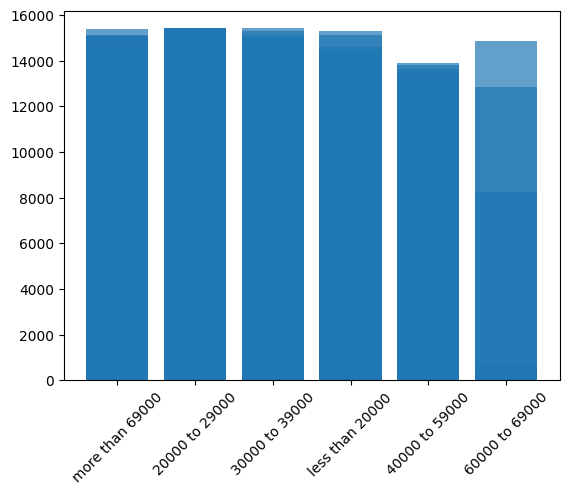

In [ ]:
# distribution of claim amounts for both fraudulent claims
Y = dataset[dataset['FraudFound_P']== 1]['VehiclePrice']
X = dataset[dataset['FraudFound_P'] == 1].index
print(Y)
plt.bar(Y, X, alpha=0.7)
plt.xticks(rotation=45)
plt.show()

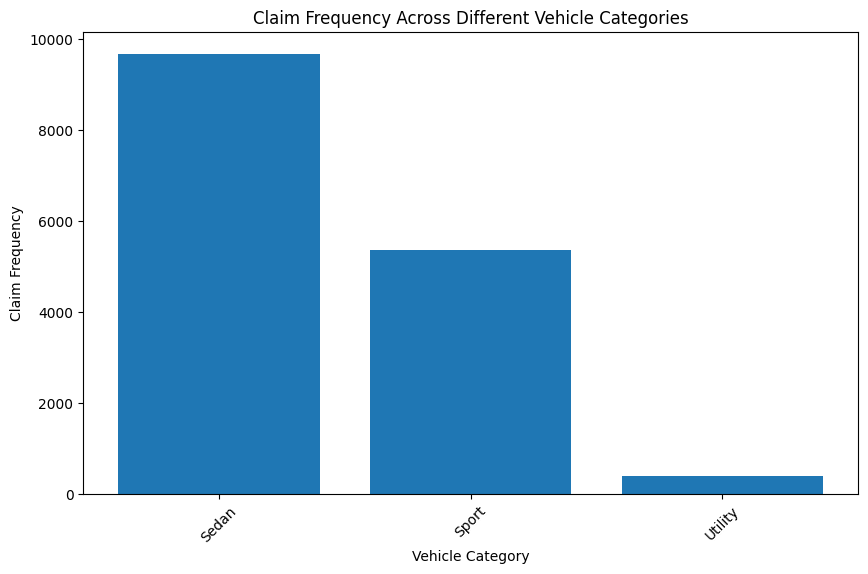

In [ ]:
#varaition of claim frequncy across different vehicle types
claim_frequency_by_vehicle_type = dataset.groupby('VehicleCategory')['PolicyNumber'].count().reset_index()
claim_frequency_by_vehicle_type.rename(columns={'PolicyNumber': 'ClaimFrequency'}, inplace=True)
claim_frequency_by_vehicle_type = claim_frequency_by_vehicle_type.sort_values(by='ClaimFrequency', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(claim_frequency_by_vehicle_type['VehicleCategory'], claim_frequency_by_vehicle_type['ClaimFrequency'])
plt.xlabel('Vehicle Category')
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency Across Different Vehicle Categories')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

As we can see that Sedan has the highest number of claim reports. Let's see how many of these reports are non fraudulant

In [ ]:
sedan_fraudulent_claims = dataset[(dataset['VehicleCategory'] == 'Sedan') & (dataset['FraudFound_P'] == 1)]
print(sedan_fraudulent_claims.value_counts())

Month  WeekOfMonth  DayOfWeek  Make       AccidentArea  DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex   MaritalStatus  Age  Fault          PolicyType          VehicleCategory  VehiclePrice     FraudFound_P  PolicyNumber  RepNumber  Deductible  DriverRating  Days_Policy_Accident  Days_Policy_Claim  PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy
Apr    1            Friday     Pontiac    Rural         Wednesday         Dec           3                   Male  Married        26   Policy Holder  Sedan - All Perils  Sedan            20000 to 29000   1             2485          6          400         4             more than 30          more than 30       none                7 years       31 to 35           No                 No              External   none                 no change            1 vehicle     1994  All Perils    1
Mar    4            Thursday   Ch

There are total of 795 fraud claims in Sedan out of 9k claims(approx)

In [ ]:
sedan_fraudulent_claims = dataset[(dataset['VehicleCategory'] == 'Sport') & (dataset['FraudFound_P'] == 1)]
print(sedan_fraudulent_claims.value_counts())

Month  WeekOfMonth  DayOfWeek  Make     AccidentArea  DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex     MaritalStatus  Age  Fault          PolicyType         VehicleCategory  VehiclePrice     FraudFound_P  PolicyNumber  RepNumber  Deductible  DriverRating  Days_Policy_Accident  Days_Policy_Claim  PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy
Apr    1            Wednesday  Honda    Urban         Thursday          Apr           1                   Male    Single         16   Policy Holder  Sport - Collision  Sport            more than 69000  1             11331         1          400         2             more than 30          more than 30       2 to 4              4 years       18 to 20           No                 No              External   none                 no change            1 vehicle     1995  Collision     1
Jun    4            Sunday     Hond

In [ ]:
sedan_fraudulent_claims = dataset[(dataset['VehicleCategory'] == 'Utility') & (dataset['FraudFound_P'] == 1)]
print(sedan_fraudulent_claims.value_counts())

Month  WeekOfMonth  DayOfWeek  Make       AccidentArea  DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex   MaritalStatus  Age  Fault          PolicyType            VehicleCategory  VehiclePrice     FraudFound_P  PolicyNumber  RepNumber  Deductible  DriverRating  Days_Policy_Accident  Days_Policy_Claim  PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy
Apr    1            Tuesday    Pontiac    Urban         Thursday          Apr           1                   Male  Married        48   Policy Holder  Utility - All Perils  Utility          more than 69000  1             11290         6          400         1             more than 30          more than 30       1                   7 years       41 to 50           No                 No              External   none                 no change            1 vehicle     1995  All Perils    1
Aug    1            Friday   

Bagging and Boosting

Bagging

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('fraud_oracle.csv')

In [ ]:
dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
y=dataset['FraudFound_P']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [ ]:
x=dataset.drop(columns=['FraudFound_P'])

In [ ]:
x

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
x=x.apply(le.fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(12336, 32)

In [ ]:
y_train.shape

(12336,)

In [ ]:
x_test.shape

(3084, 32)

In [ ]:
y_test.shape

(3084,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.score(x_test,y_test)

0.9383916990920882

In [ ]:
rfc.score(x_train,y_train)

1.0

Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbdt=GradientBoostingClassifier(n_estimators=300)

In [ ]:
y_train.shape

(12336,)

In [ ]:
x_train.shape

(12336, 32)

In [ ]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=300)

In [ ]:
y_test.shape

(3084,)

In [ ]:
gbdt.score(x_test,y_test)

0.9439040207522698

In [ ]:
gbdt.score(x_train,y_train)

0.9546854734111544

Decision Trees


In [ ]:
# finding the model accuracy by using decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Decision tree accuracy:", dt.score(x_test, y_test))

Decision tree accuracy: 0.9111543450064851


KNN


In [ ]:
# finding the model accuracy by using KNN technique
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("KNN accuracy:", knn.score(x_test, y_test))

KNN accuracy: 0.9335278858625162
